<h1 style = "color : green"> External Diversion</h1>

<b> This Notebook is used to Visualize the User Browsing Behavior </b>

<b style = "color : red" > 1. Including all the import statements </b>

In [13]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart

<b style = "color : red" > 2. Read the Data from the CSV file with pandas </b>

In [14]:
data = pd.read_csv('tst1.csv')

#To Reverse The Dataframe rows 
data = data.sort_index(axis=1 ,ascending=True)
data = data.iloc[::-1]
data = data.sort_index(ascending=True, axis=0)
data = data.reindex(index=data.index[::-1])
data.head()

,<ROOT>_id,"[]""_id""",id,lastVisitTime,lastVisitTimeUTC,title,typedCount,url,visitCount
35,2000001,3000036,52,"12/12/2017, 6:43:39 PM",12/12/2017 1:13:39 PM,Log in to Facebook | Facebook,0,https://www.facebook.com/login.php?login_attem...,2
34,2000001,3000035,55,"12/12/2017, 6:44:01 PM",12/12/2017 1:14:01 PM,TROLL MBBS - Posts,0,https://www.facebook.com/trollmbbs/posts/20097...,1
33,2000001,3000034,56,"12/12/2017, 6:44:39 PM",12/12/2017 1:14:39 PM,theverge - Google Search,0,https://www.google.co.in/search?q=theverge&oq=...,1
32,2000001,3000033,57,"12/12/2017, 6:44:49 PM",12/12/2017 1:14:49 PM,The Verge,0,https://www.theverge.com/,2
31,2000001,3000032,58,"12/12/2017, 6:46:04 PM",12/12/2017 1:16:04 PM,Brockhampton is reinventing the boy band with ...,0,https://www.theverge.com/2017/12/11/16748260/b...,2


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [17]:
#data = data.drop(["[]_id",'<ROOT>_id','typedCount'],axis=1)
#data = data.dropna()
#data.drop(48)
data

,<ROOT>_id,"[]""_id""",id,lastVisitTime,lastVisitTimeUTC,title,typedCount,url,visitCount
35,2000001,3000036,52,"12/12/2017, 6:43:39 PM",12/12/2017 1:13:39 PM,Log in to Facebook | Facebook,0,https://www.facebook.com/login.php?login_attem...,2
34,2000001,3000035,55,"12/12/2017, 6:44:01 PM",12/12/2017 1:14:01 PM,TROLL MBBS - Posts,0,https://www.facebook.com/trollmbbs/posts/20097...,1
33,2000001,3000034,56,"12/12/2017, 6:44:39 PM",12/12/2017 1:14:39 PM,theverge - Google Search,0,https://www.google.co.in/search?q=theverge&oq=...,1
32,2000001,3000033,57,"12/12/2017, 6:44:49 PM",12/12/2017 1:14:49 PM,The Verge,0,https://www.theverge.com/,2
31,2000001,3000032,58,"12/12/2017, 6:46:04 PM",12/12/2017 1:16:04 PM,Brockhampton is reinventing the boy band with ...,0,https://www.theverge.com/2017/12/11/16748260/b...,2
30,2000001,3000031,59,"12/12/2017, 6:46:11 PM",12/12/2017 1:16:11 PM,bacteria - Google Search,0,https://www.google.co.in/search?q=bacteria&oq=...,1
29,2000001,3000030,60,"12/12/2017, 6:46:17 PM",12/12/2017 1:16:17 PM,merge sort - Google Search,0,https://www.google.co.in/search?q=merge+sort&o...,1
28,2000001,3000029,61,"12/12/2017, 6:46:19 PM",12/12/2017 1:16:19 PM,Merge Sort - GeeksforGeeks,0,http://www.geeksforgeeks.org/merge-sort/,1
27,2000001,3000028,62,"12/12/2017, 6:46:22 PM",12/12/2017 1:16:22 PM,Bacteria - Wikipedia,0,https://en.wikipedia.org/wiki/Bacteria,1
26,2000001,3000027,63,"12/12/2017, 6:47:24 PM",12/12/2017 1:17:24 PM,theverge - Google Search,0,https://www.google.co.in/search?q=theverge&oq=...,1


<b style = "color : red" >4. categorizing the URL</b>

In [18]:
TAG_RE = re.compile(r"<[^>]+>")
def remove_tags(text):
    return TAG_RE.sub('', text)

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res


def datum_categ(text):

    datum_box = DatumBox("2a13913dda346761765020c1f66e34f8")
    return datum_box.topic_classification(text)

def text_extract(url):
    try:
        
        try:
            page3 = urllib2.urlopen(url).read()
        
        except urllib2.HTTPError, err:
        
            if err.code == 404:
                print "Page not found!"
                return 'Error'
        
            elif err.code == 403:
                print "Access denied!"
                return 'Error'
    
            else:
                print "Something happened! Error code", err.code
                return 'Error'
        
        except urllib2.URLError, err:
            print "Some other error happened:", err.reason
            return 'Error'
        
        #page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


def categ(a):
    url = a
    return datum_categ(text_extract(url))
    


In [19]:
x = data

test_data = x.loc[:,('title','url','lastVisitTime','visitCount')] 


def categorize (name):
    if('www.google' in str(name)): 
        return 'Search' 
    elif ('mail' in str(name)):
        return 'Mail'
    else:
        return categ(name)

test_data['category'] = test_data['url'].map(categorize)

test_data

DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Something happened! Error code 503
DESCRIPTION IS NONE!
Something happened! Error code 503


,title,url,lastVisitTime,visitCount,category
35,Log in to Facebook | Facebook,https://www.facebook.com/login.php?login_attem...,"12/12/2017, 6:43:39 PM",2,Science
34,TROLL MBBS - Posts,https://www.facebook.com/trollmbbs/posts/20097...,"12/12/2017, 6:44:01 PM",1,Recreation & Activities
33,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:44:39 PM",1,Search
32,The Verge,https://www.theverge.com/,"12/12/2017, 6:44:49 PM",2,Computers & Technology
31,Brockhampton is reinventing the boy band with ...,https://www.theverge.com/2017/12/11/16748260/b...,"12/12/2017, 6:46:04 PM",2,Arts
30,bacteria - Google Search,https://www.google.co.in/search?q=bacteria&oq=...,"12/12/2017, 6:46:11 PM",1,Search
29,merge sort - Google Search,https://www.google.co.in/search?q=merge+sort&o...,"12/12/2017, 6:46:17 PM",1,Search
28,Merge Sort - GeeksforGeeks,http://www.geeksforgeeks.org/merge-sort/,"12/12/2017, 6:46:19 PM",1,Computers & Technology
27,Bacteria - Wikipedia,https://en.wikipedia.org/wiki/Bacteria,"12/12/2017, 6:46:22 PM",1,Science
26,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:47:24 PM",1,Search


<b style = "color : red" >5. Calculating the amount of time spent on each URL</b>

In [20]:
i_max = test_data.shape[0]
time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    
    
    i_base = test_data.iloc[i]['lastVisitTime']
    j_base = test_data.iloc[j]['lastVisitTime']
    if (i_base.split('/')[0] == j_base.split('/')[0] ):
        if (i_base .split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append(i_time - j_time)
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values

In [21]:
test_data

,title,url,lastVisitTime,visitCount,category,timeSpent
35,Log in to Facebook | Facebook,https://www.facebook.com/login.php?login_attem...,"12/12/2017, 6:43:39 PM",2,Science,NA
34,TROLL MBBS - Posts,https://www.facebook.com/trollmbbs/posts/20097...,"12/12/2017, 6:44:01 PM",1,Recreation & Activities,22
33,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:44:39 PM",1,Search,38
32,The Verge,https://www.theverge.com/,"12/12/2017, 6:44:49 PM",2,Computers & Technology,10
31,Brockhampton is reinventing the boy band with ...,https://www.theverge.com/2017/12/11/16748260/b...,"12/12/2017, 6:46:04 PM",2,Arts,75
30,bacteria - Google Search,https://www.google.co.in/search?q=bacteria&oq=...,"12/12/2017, 6:46:11 PM",1,Search,7
29,merge sort - Google Search,https://www.google.co.in/search?q=merge+sort&o...,"12/12/2017, 6:46:17 PM",1,Search,6
28,Merge Sort - GeeksforGeeks,http://www.geeksforgeeks.org/merge-sort/,"12/12/2017, 6:46:19 PM",1,Computers & Technology,2
27,Bacteria - Wikipedia,https://en.wikipedia.org/wiki/Bacteria,"12/12/2017, 6:46:22 PM",1,Science,3
26,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:47:24 PM",1,Search,62


<br>
<br>
<b style = "color : red ;font-size: 20px " >6. Visualizing the Data to understand the browsing behavior</b>
<br>
<br>

<b >6.1 Amount Of Time Spent On Each Category </b>

[('Arts', 134), ('Business & Economy', 9), ('Computers & Technology', 168), ('Error', 0), ('Health', 0), ('Home & Domestic Life', 0), ('Mail', 0), ('News', 0), ('Recreation & Activities', 22), ('Reference & Education', 0), ('Science', 3), ('Search', 222), ('Shopping', 10), ('Society', 0), ('Sports', 0)]
Amount Of Time Spent On Each Category


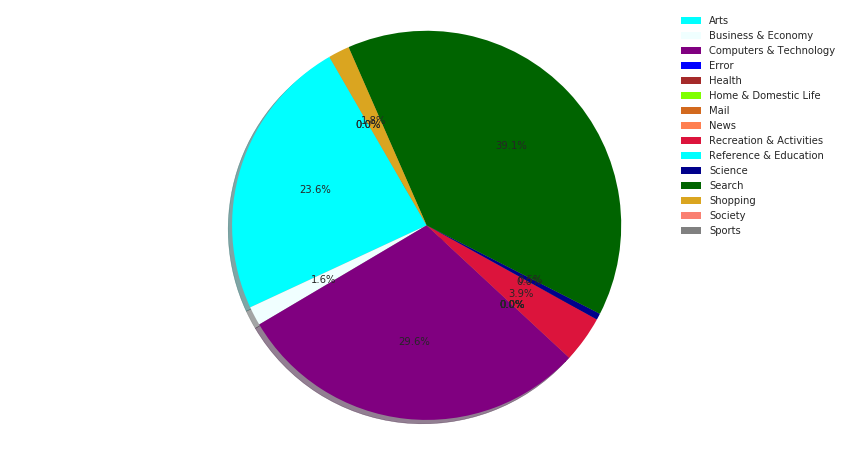

In [22]:
# Listing the lables
labels = "Arts","Business & Economy","Computers & Technology","Health","Home & Domestic Life","Mail","News","Search","Shopping","Society","Sports","Recreation & Activities","Reference & Education","Science","Error"


# Augumenting the time spent on each label
i_max = test_data.shape[0]


category_dict = {"Arts":0 ,"Business & Economy":0,
                 "Computers & Technology":0,"Error":0,
                 "Health":0,"Home & Domestic Life":0,"News":0,"Shopping":0,"Society":0,
                 "Sports":0,"Recreation & Activities":0,"Reference & Education":0,"Science":0,
                 "Search":0,"Mail":0}



for i in range(0,i_max):
    if (str(test_data.iloc[i]['timeSpent']) is "NA" ):
        category_dict[test_data.iloc[i]['category']] += 0
    else:
        category_dict[test_data.iloc[i]['category']] += int(test_data.iloc[i]['timeSpent'])


ordered_category_dict = sorted(category_dict.items())

sizes = []

for i in ordered_category_dict:
    sizes.append(i[1])



print ordered_category_dict
#print sizes

# Now drawing the Pie Diagrm

fig1, ax1 = plt.subplots(figsize=(15,8))
#colors = sns.color_palette("hls",14)

colors = ['aqua','azure','purple','blue','brown','chartreuse','chocolate','coral','crimson','cyan','darkblue',
          'darkgreen','goldenrod','salmon','grey']

ax1.pie(sizes, explode=None ,colors = colors, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=120)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(("Arts","Business & Economy","Computers & Technology","Error","Health","Home & Domestic Life","Mail","News",'Recreation & Activities',
            'Reference & Education','Science','Search','Shopping','Society','Sports'),
           scatterpoints=1,loc='upper right',fontsize=10)

print 'Amount Of Time Spent On Each Category'
plt.show()



<br>
<br>
<b >6.2 Time Spent on each category in Chronological order</b>
<br>
<br>

In [23]:
# mapping the catagories with specific colors

color_dict = { "Arts":"aqua","Business & Economy":"azure","Computers & Technology":"purple","Error":"blue",
              "Health":"brown", "Home & Domestic Life" : "chartreuse","Mail":"chocolate","News":"coral",
              "Recreation & Activities":"crimson", 'Reference & Education':"cyan",'Science':"purple",
              "Search":"darkgreen",'Shopping':"goldenrod",'Society':"salmon",'Sports':"grey" }


color_list = []
def map_color(color):
        return color_dict[color]

for i in range(0,test_data.shape[0]):
    color_list.append(map_color(test_data.iloc[i]['category']))

td = pd.Series(color_list)
test_data['color'] = td.values

test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,color
35,Log in to Facebook | Facebook,https://www.facebook.com/login.php?login_attem...,"12/12/2017, 6:43:39 PM",2,Science,NA,purple
34,TROLL MBBS - Posts,https://www.facebook.com/trollmbbs/posts/20097...,"12/12/2017, 6:44:01 PM",1,Recreation & Activities,22,crimson
33,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:44:39 PM",1,Search,38,darkgreen
32,The Verge,https://www.theverge.com/,"12/12/2017, 6:44:49 PM",2,Computers & Technology,10,purple
31,Brockhampton is reinventing the boy band with ...,https://www.theverge.com/2017/12/11/16748260/b...,"12/12/2017, 6:46:04 PM",2,Arts,75,aqua
30,bacteria - Google Search,https://www.google.co.in/search?q=bacteria&oq=...,"12/12/2017, 6:46:11 PM",1,Search,7,darkgreen
29,merge sort - Google Search,https://www.google.co.in/search?q=merge+sort&o...,"12/12/2017, 6:46:17 PM",1,Search,6,darkgreen
28,Merge Sort - GeeksforGeeks,http://www.geeksforgeeks.org/merge-sort/,"12/12/2017, 6:46:19 PM",1,Computers & Technology,2,purple
27,Bacteria - Wikipedia,https://en.wikipedia.org/wiki/Bacteria,"12/12/2017, 6:46:22 PM",1,Science,3,purple
26,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:47:24 PM",1,Search,62,darkgreen


<h2> Saving as an Offline copy</h2>

In [24]:
import pickle 
with open('/home/sreeram_0xb5e/Desktop/ED(tst1.csv)', 'wb') as f:
    pickle.dump(test_data, f, -1)

In [25]:
with open('/home/sreeram_0xb5e/Desktop/ED(tst1.csv)', 'rb') as f:
    test_data= pickle.load(f)

test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,color
35,Log in to Facebook | Facebook,https://www.facebook.com/login.php?login_attem...,"12/12/2017, 6:43:39 PM",2,Science,NA,purple
34,TROLL MBBS - Posts,https://www.facebook.com/trollmbbs/posts/20097...,"12/12/2017, 6:44:01 PM",1,Recreation & Activities,22,crimson
33,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:44:39 PM",1,Search,38,darkgreen
32,The Verge,https://www.theverge.com/,"12/12/2017, 6:44:49 PM",2,Computers & Technology,10,purple
31,Brockhampton is reinventing the boy band with ...,https://www.theverge.com/2017/12/11/16748260/b...,"12/12/2017, 6:46:04 PM",2,Arts,75,aqua
30,bacteria - Google Search,https://www.google.co.in/search?q=bacteria&oq=...,"12/12/2017, 6:46:11 PM",1,Search,7,darkgreen
29,merge sort - Google Search,https://www.google.co.in/search?q=merge+sort&o...,"12/12/2017, 6:46:17 PM",1,Search,6,darkgreen
28,Merge Sort - GeeksforGeeks,http://www.geeksforgeeks.org/merge-sort/,"12/12/2017, 6:46:19 PM",1,Computers & Technology,2,purple
27,Bacteria - Wikipedia,https://en.wikipedia.org/wiki/Bacteria,"12/12/2017, 6:46:22 PM",1,Science,3,purple
26,theverge - Google Search,https://www.google.co.in/search?q=theverge&oq=...,"12/12/2017, 6:47:24 PM",1,Search,62,darkgreen


</br>
</br>
Choosing the Sample Data from Detailed Analysis
</br>
</br>

In [26]:
print test_data.shape[0]

sample_test_data = test_data[:]
print sample_test_data.shape[0]

36
36


</br>
</br>
Time Spent Graph
</br>
</br>

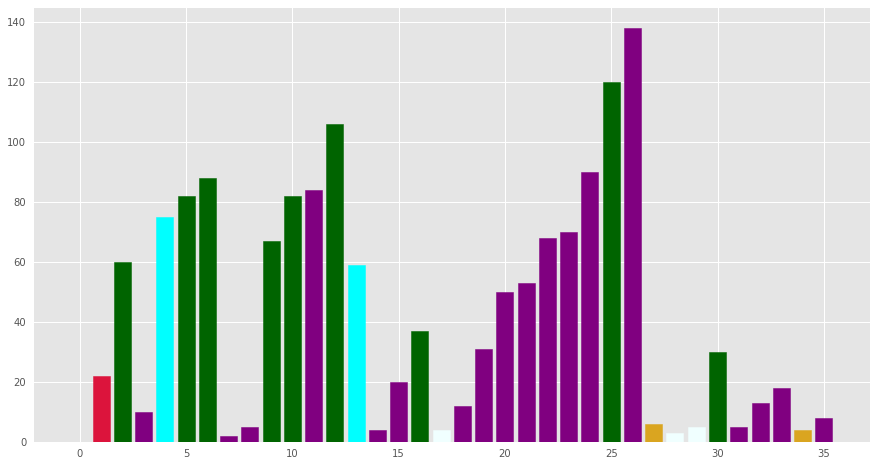

[11, 30, 23, 36, 38, 39, 32, 32, 45, 48, 48, 52, 53, 46, 49, 51, 45, 41, 43, 46, 46, 48, 48, 50, 53, 55, 50, 46, 46, 48, 45, 45, 46, 43, 40]


In [33]:
time_spent_list = []

temp = 0
temp_category = ''


switch_time = []
count = 1
switch_temp = 0

for i in range(0,sample_test_data.shape[0]):
    
    if (sample_test_data.iloc[i]['timeSpent'] =='NA'):
        time_spent_list.append(0)
    
    else:
        
        switch_temp += sample_test_data.iloc[i]['timeSpent']
        if ((temp_category == sample_test_data.iloc[i]['category']) or (sample_test_data.iloc[i]['category'] == 'Search') 
             or (temp_category == 'Computers & Technology' and sample_test_data.iloc[i]['category'] == 'Science') or
             (temp_category == 'Science' and sample_test_data.iloc[i]['category'] == 'Computers & Technology')):
        
            acc_temp = temp + sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(acc_temp)
            temp = acc_temp
            
        else:
            count += 1
            temp = sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(temp)
            temp_category = sample_test_data.iloc[i]['category']
        
        switch_time.append(switch_temp/count)

        

figure = plt.figure(figsize=(15,8))
pts = np.arange(sample_test_data.shape[0])
p = plt.bar(pts, height= time_spent_list)



for i in range(0,sample_test_data.shape[0]):
    p.patches[i].set_color(color_list[i])
    

plt.show()

print switch_time

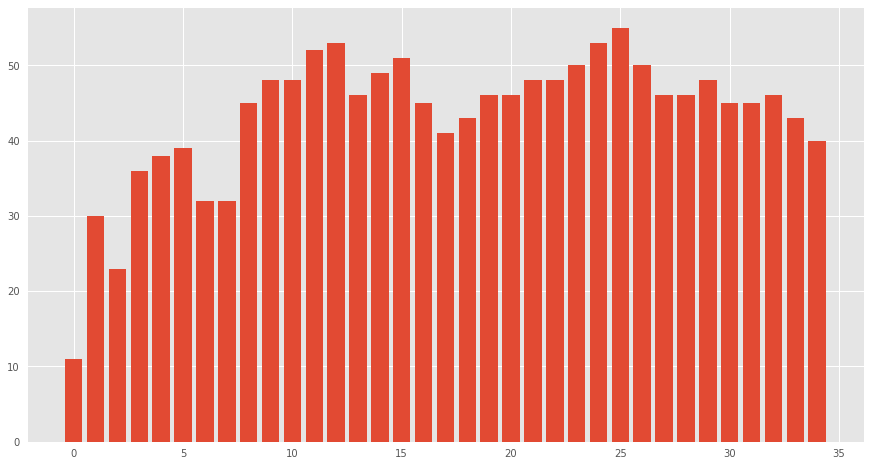

In [34]:
figure = plt.figure(figsize=(15,8))
pts = np.arange(len(switch_time))
p = plt.bar(pts, height= switch_time)

plt.show()

In [49]:
inc = 0.0
dec = 0.0

dec_count = 0.0

for i in range(0,len(switch_time)-1):
    a = switch_time [i]
    b = switch_time [i+1]
    
    #Increasing 
    if ((a-b) < 0 ):
        inc += (b-a)
        
    # Decreasing
    if ((a-b) > 0):
        dec += (a-b)
        dec_count += 1
        

tot = inc + dec
print "Inc %"
print (inc / tot) * 100
print "Dec %"
print (dec / tot) * 100
print "DEC NUMBER COUNT"
print (dec_count/len(switch_time)) * 100
    

Inc %
61.4173228346
Dec %
38.5826771654
DEC NUMBER COUNT
28.5714285714
